# 02582 Computational Data Analysis - Case 2

**Group 16 - members**:
- Anastasia Maftei: s226765
- Beatriz Braga De Carvalho: s233576
- Raquel Moleiro Marques: s243636
- Sree Keerthi Desu: s243933

___________

### Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

________

## Load data

In [3]:
data = pd.read_csv('data/HR_data_2.csv')
data.head()

,Unnamed: 0,HR_TD_Mean,HR_TD_Median,HR_TD_std,HR_TD_Min,HR_TD_Max,HR_TD_AUC,HR_TD_Kurtosis,HR_TD_Skew,HR_TD_Slope_min,...,upset,hostile,alert,ashamed,inspired,nervous,attentive,afraid,active,determined
0,0,78.663878,76.70,7.480043,67.25,92.48,23048.450,-1.091448,0.369955,-0.7300,...,1.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,2.0,2.0
1,1,76.540732,76.61,2.584756,69.82,82.33,23959.920,-0.245338,0.338732,-0.3600,...,2.0,1.0,3.0,2.0,2.0,2.0,3.0,1.0,3.0,3.0
2,2,78.173563,77.92,2.681255,72.22,82.80,20324.605,-0.615922,-0.233047,-0.6300,...,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
3,3,83.073688,83.88,7.363598,69.42,96.12,24924.300,-0.866610,-0.046021,-0.4650,...,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
4,4,72.281250,72.91,3.193762,64.95,79.98,23052.100,0.200401,-0.560948,-0.3725,...,3.0,1.0,3.0,2.0,3.0,3.0,4.0,2.0,4.0,4.0


In [4]:
data.columns

Index(['Unnamed: 0', 'HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std', 'HR_TD_Min',
       'HR_TD_Max', 'HR_TD_AUC', 'HR_TD_Kurtosis', 'HR_TD_Skew',
       'HR_TD_Slope_min', 'HR_TD_Slope_max', 'HR_TD_Slope_mean', 'HR_TD_Slope',
       'TEMP_TD_Mean', 'TEMP_TD_Median', 'TEMP_TD_std', 'TEMP_TD_Min',
       'TEMP_TD_Max', 'TEMP_TD_AUC', 'TEMP_TD_Kurtosis', 'TEMP_TD_Skew',
       'TEMP_TD_Slope_min', 'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean',
       'TEMP_TD_Slope', 'EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std',
       'EDA_TD_P_Min', 'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis',
       'EDA_TD_P_Skew', 'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max',
       'EDA_TD_P_Slope_mean', 'EDA_TD_P_Slope', 'EDA_TD_T_Mean',
       'EDA_TD_T_Median', 'EDA_TD_T_std', 'EDA_TD_T_Min', 'EDA_TD_T_Max',
       'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis', 'EDA_TD_T_Skew',
       'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max', 'EDA_TD_T_Slope_mean',
       'EDA_TD_T_Slope', 'EDA_TD_P_Peaks', 'EDA_TD_P_RT', 'EDA_TD_P_R

In [5]:
# Remove the first column
data = data.drop(columns=['Unnamed: 0'])

In [6]:
data.info() # Detailed information on features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 70 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HR_TD_Mean           312 non-null    float64
 1   HR_TD_Median         312 non-null    float64
 2   HR_TD_std            312 non-null    float64
 3   HR_TD_Min            312 non-null    float64
 4   HR_TD_Max            312 non-null    float64
 5   HR_TD_AUC            312 non-null    float64
 6   HR_TD_Kurtosis       312 non-null    float64
 7   HR_TD_Skew           312 non-null    float64
 8   HR_TD_Slope_min      312 non-null    float64
 9   HR_TD_Slope_max      312 non-null    float64
 10  HR_TD_Slope_mean     312 non-null    float64
 11  HR_TD_Slope          312 non-null    float64
 12  TEMP_TD_Mean         312 non-null    float64
 13  TEMP_TD_Median       312 non-null    float64
 14  TEMP_TD_std          312 non-null    float64
 15  TEMP_TD_Min          312 non-null    flo

In [7]:
# Check for missing values
# print vars that have missing values and their counts
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing values:\n", missing_values)

Missing values:
 EDA_TD_P_RT     1
EDA_TD_P_ReT    1
inspired        2
attentive       1
afraid          1
active          1
determined      2
dtype: int64


In [8]:
id_columns = ['Round', 'Phase', 'Individual', 'Puzzler', 'original_ID', 'raw_data_path', 'Team_ID', 'Cohort']

In [9]:
# Extract questionnaire data
questionnaire = data[[col for col in data.columns if 'EDA_' not in col if 'TEMP_' not in col if 'HR_' not in col]].copy()

# Extract numerical data
numerical = data[[col for col in data.columns if 'EDA_' in col or 'TEMP_' in col or 'HR_' in col or col in col in id_columns ]].copy()

In [10]:
# Extract individual time domain signal measures
heart_rate = pd.concat([data[id_columns], data[[col for col in data.columns if 'HR_TD_' in col]]], axis=1)
temperature = pd.concat([data[id_columns], data[[col for col in data.columns if 'TEMP_TD_' in col]]], axis=1)
eda_phasic = pd.concat([data[id_columns], data[[col for col in data.columns if 'EDA_TD_P_' in col]]], axis=1)
# ^ also has reaction tie, peaks, and rise time
eda_tonic = pd.concat([data[id_columns], data[[col for col in data.columns if 'EDA_TD_T_' in col]]], axis=1)

__________

# Preliminary analysis

In [11]:
# Generate histograms
def hist_subplots(dataset, id_columns, fig=None):

    # Get relevant features
    rel_features = [col for col in dataset.columns if col not in id_columns]
    # print(dataset[dataset['Phase']=='phase1'])
    # Plot distribution of each feature
    if fig is None:
        fig = plt.figure(figsize=(20, 40))
    for i, col in enumerate(rel_features):
        plt.subplot(15, 4, i + 1)
        sns.histplot(dataset[dataset['Phase']=='phase1'][col], color='green', alpha=0.5, label='Phase 1', kde=True)
        sns.histplot(dataset[dataset['Phase']=='phase2'][col], color='red', alpha=0.5, label='Phase 2', kde=True)
        sns.histplot(dataset[dataset['Phase']=='phase3'][col], color='yellow', alpha=0.5, label='Phase 3', kde=True)
        plt.legend()
        plt.title(col)
    plt.tight_layout()
    plt.show()

In [12]:
# Generate correlation matrix
def corr_heatmap(dataset, id_columns):

    # Get relevant features
    rel_features = [col for col in dataset.columns if col not in id_columns]

    # Subset with only relevant features
    subset_ph1 = dataset[dataset['Phase']=='phase1'][rel_features]
    subset_ph2 = dataset[dataset['Phase']=='phase2'][rel_features]
    subset_ph3 = dataset[dataset['Phase']=='phase3'][rel_features]

    # Triangular correlation matrix
    mask_1 = np.triu(np.ones_like(subset_ph1.corr(), dtype=bool))
    mask_2 = np.triu(np.ones_like(subset_ph2.corr(), dtype=bool))
    mask_3 = np.triu(np.ones_like(subset_ph3.corr(), dtype=bool))

    # Correlation heatmap
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)
    plt.title('Phase 1 Correlation matrix')
    sns.heatmap(subset_ph1.corr(), mask=mask_1, annot=True, annot_kws={"size": 7}, cmap='vlag', center=0, vmin=-1, vmax=1, cbar=False)
    plt.subplot(1, 3, 2)
    plt.title('Phase 2 Correlation matrix')
    sns.heatmap(subset_ph2.corr(), mask=mask_2, annot=True, annot_kws={"size": 7}, cmap='vlag', center=0, vmin=-1, vmax=1, cbar=False)
    plt.subplot(1, 3, 3)
    plt.title('Phase 3 Correlation matrix')
    sns.heatmap(subset_ph3.corr(), mask=mask_3, annot=True, annot_kws={"size": 7}, cmap='vlag', center=0, vmin=-1, vmax=1)
    plt.show()

## Numerical data
### Heart rate

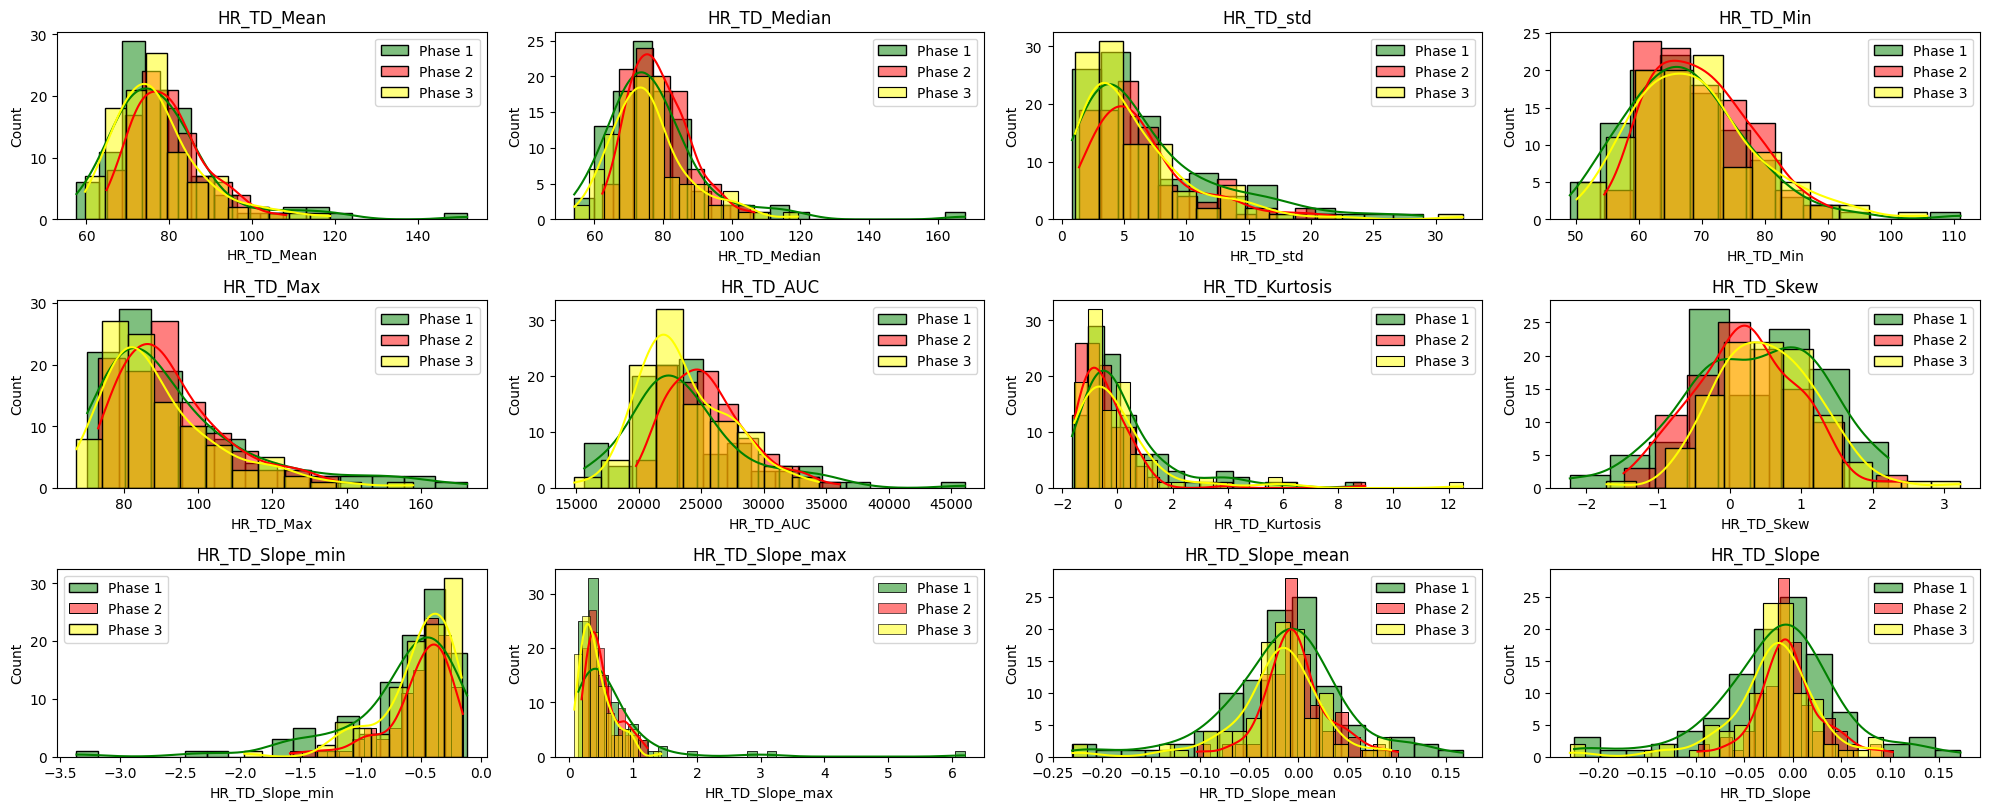

In [13]:
hist_subplots(heart_rate, id_columns)

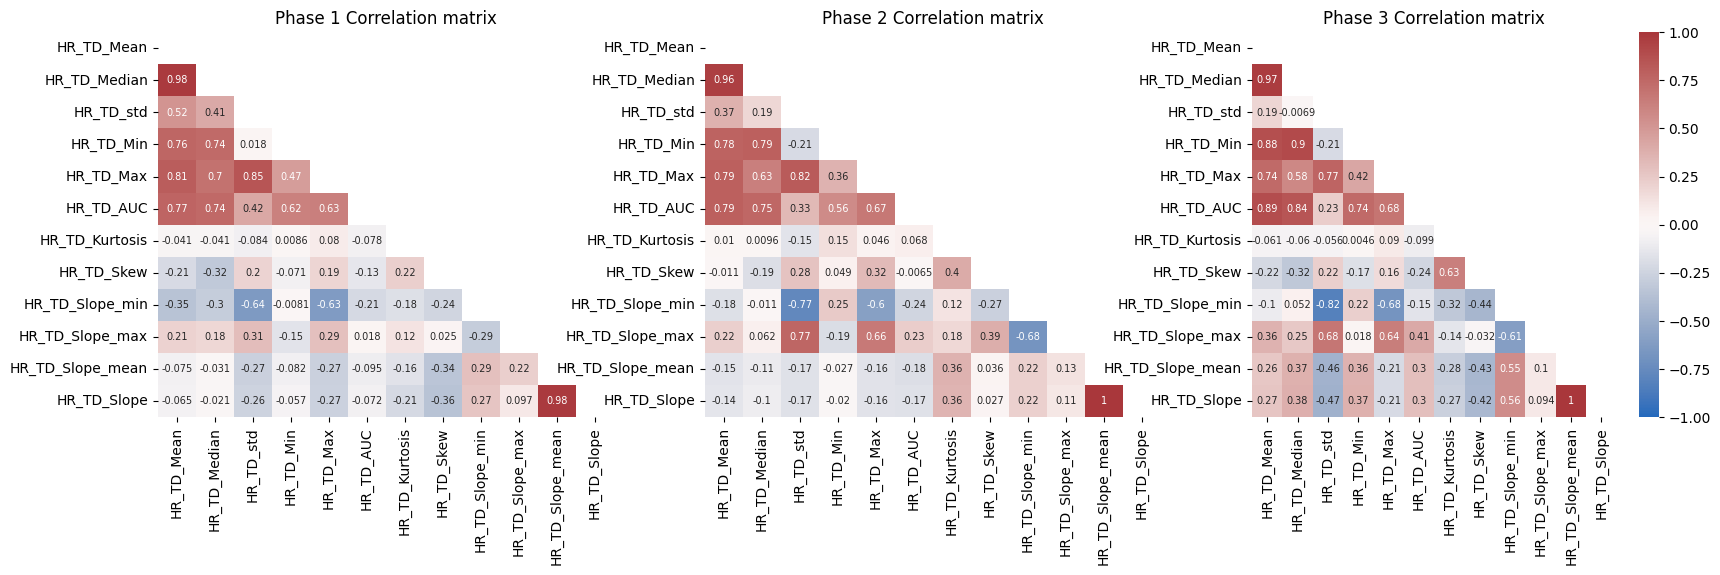

In [14]:
corr_heatmap(heart_rate, id_columns)

### Temperature

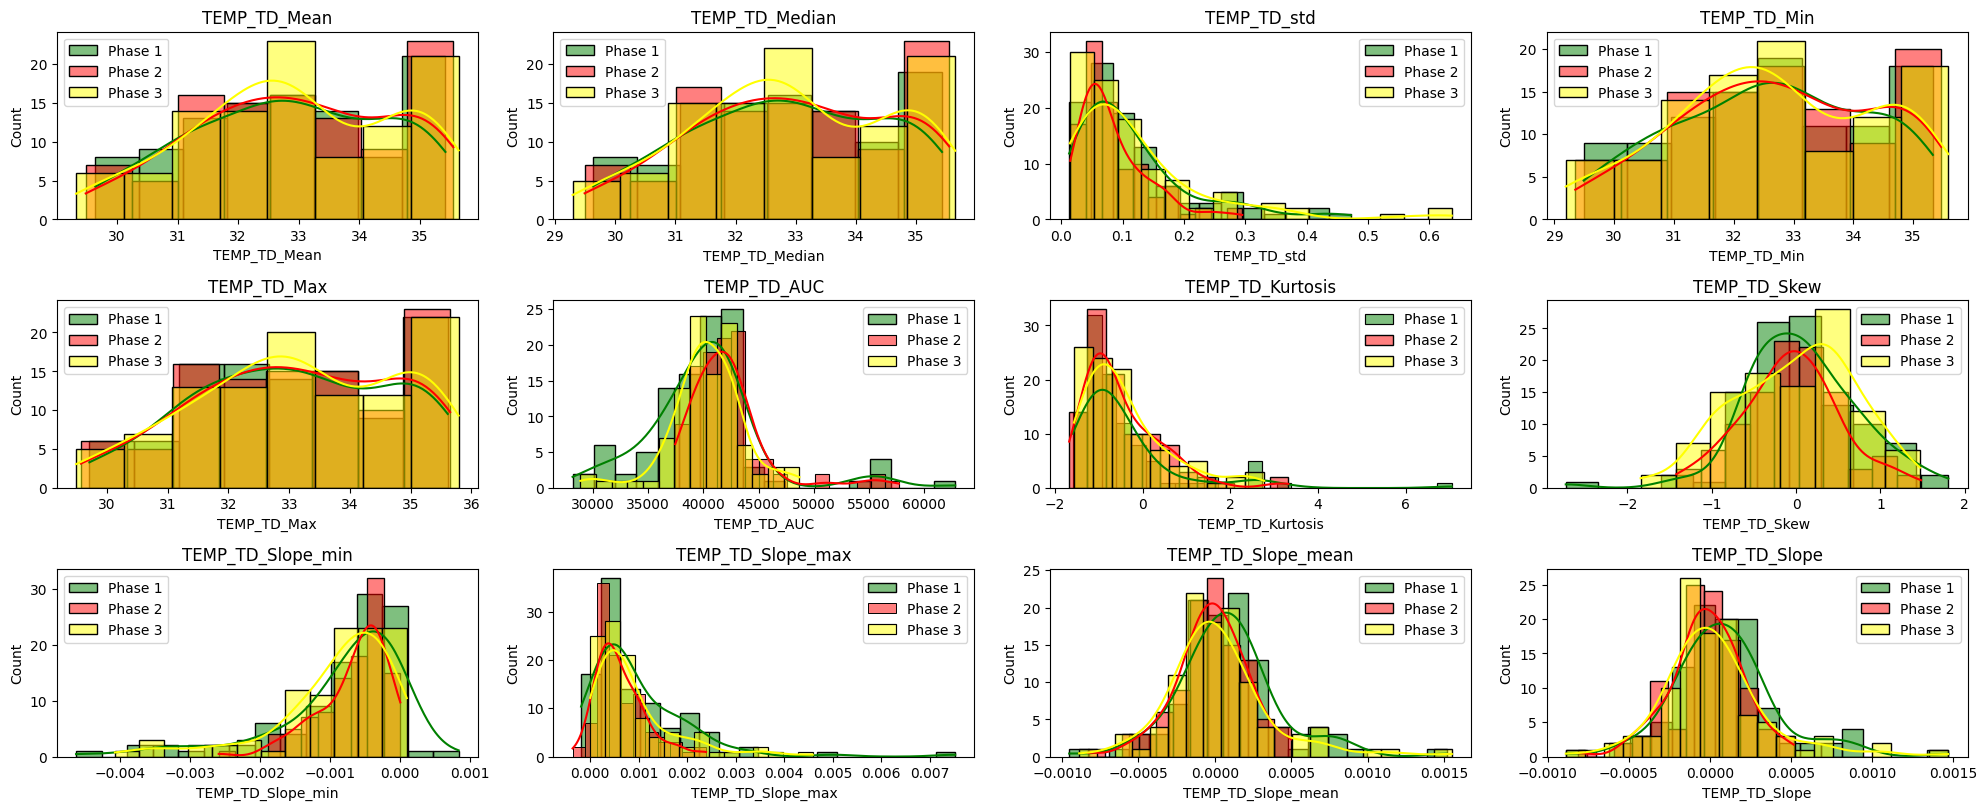

In [15]:
hist_subplots(temperature, id_columns)

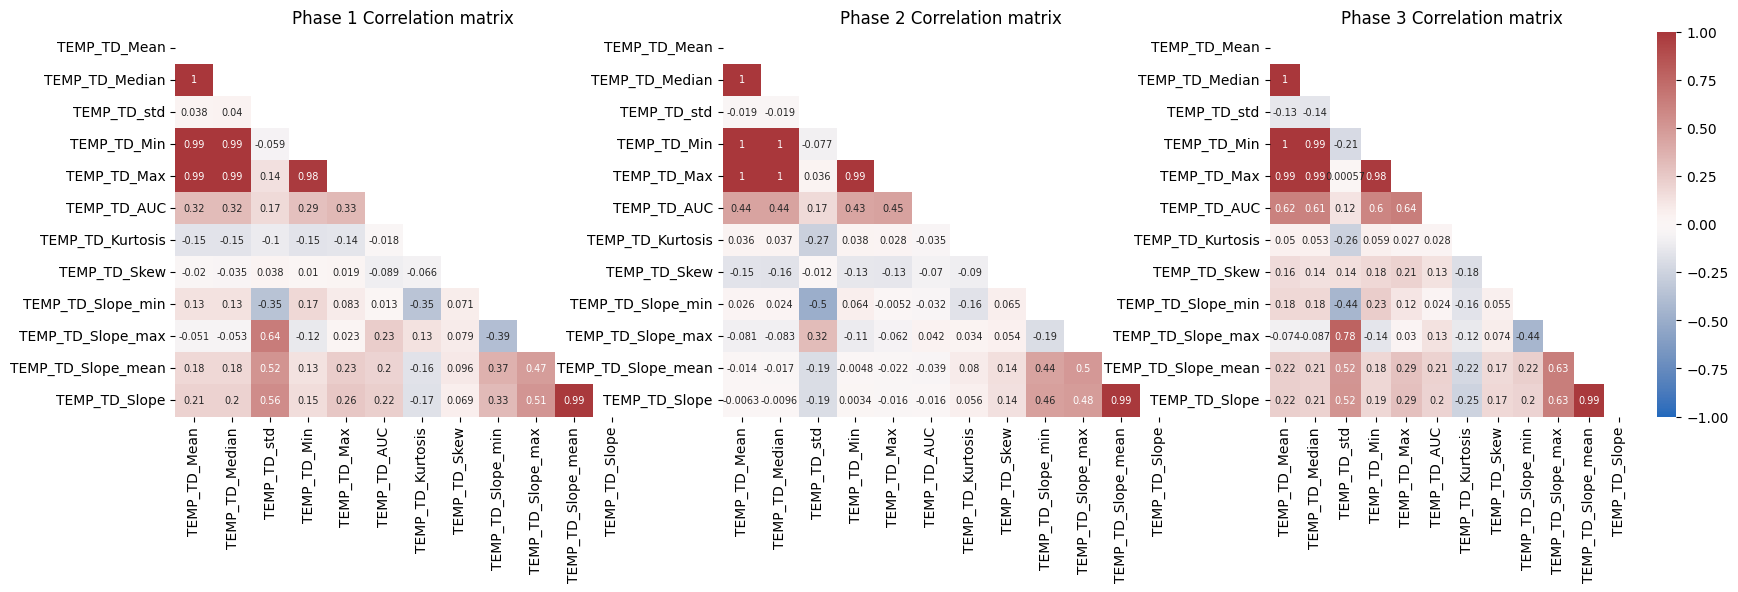

In [16]:
corr_heatmap(temperature, id_columns)

### EDA Phasic

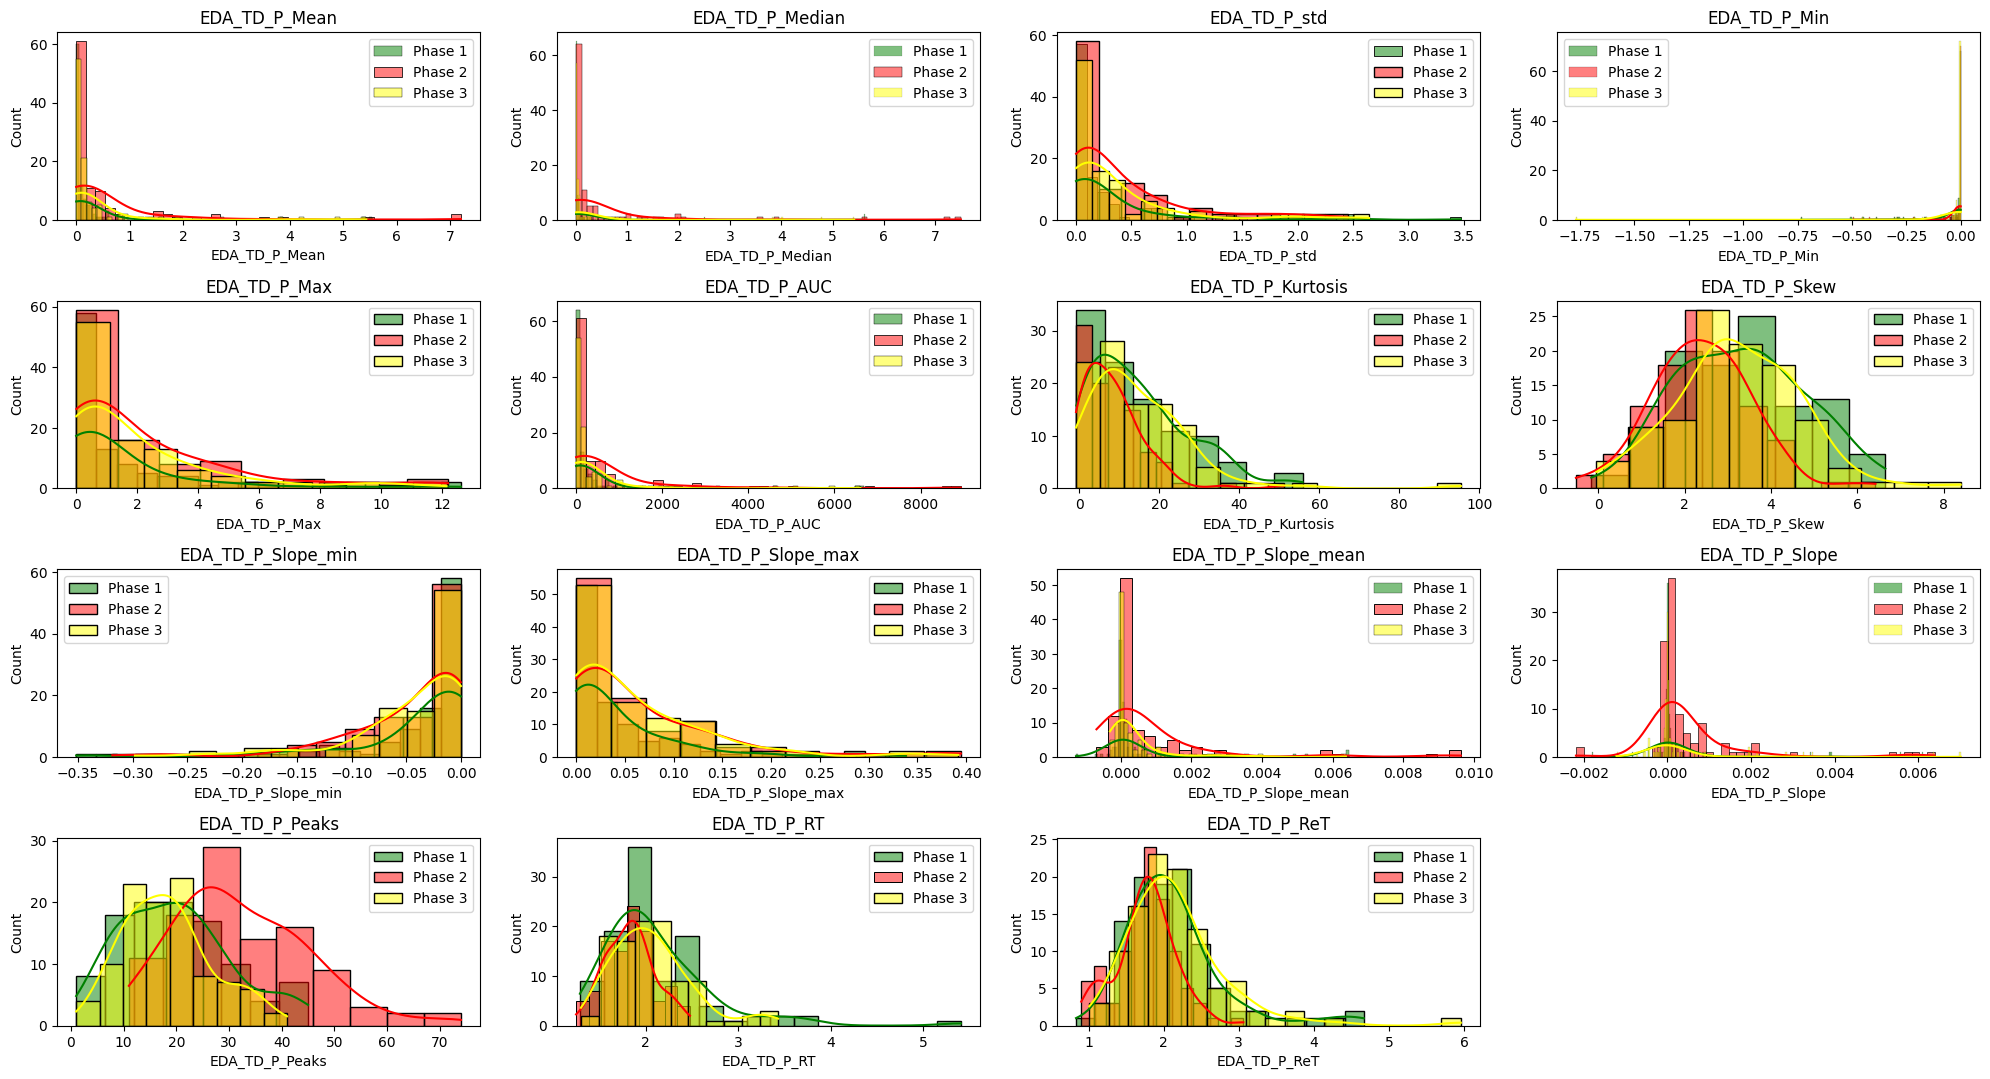

In [17]:
hist_subplots(eda_phasic, id_columns)

In [18]:
data[data['Phase']=='phase1']['EDA_TD_P_Peaks'].describe()

count    104.000000
mean      19.846154
std       10.478614
min        1.000000
25%       11.750000
50%       19.500000
75%       26.250000
max       45.000000
Name: EDA_TD_P_Peaks, dtype: float64

In [19]:
data[data['Phase']=='phase2']['EDA_TD_P_Peaks'].describe()

count    104.000000
mean      32.384615
std       12.717473
min       11.000000
25%       23.750000
50%       30.000000
75%       41.000000
max       74.000000
Name: EDA_TD_P_Peaks, dtype: float64

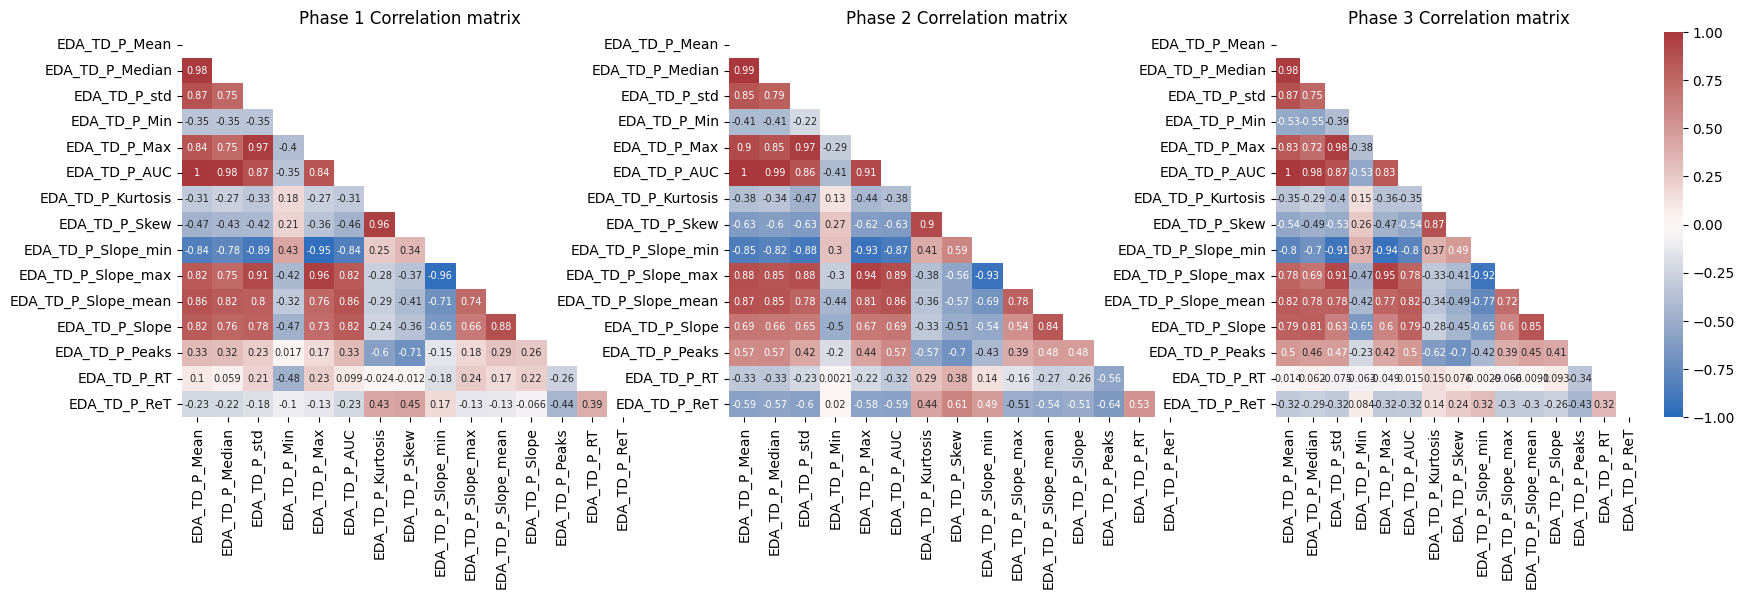

In [20]:
corr_heatmap(eda_phasic, id_columns)

### EDA Tonic

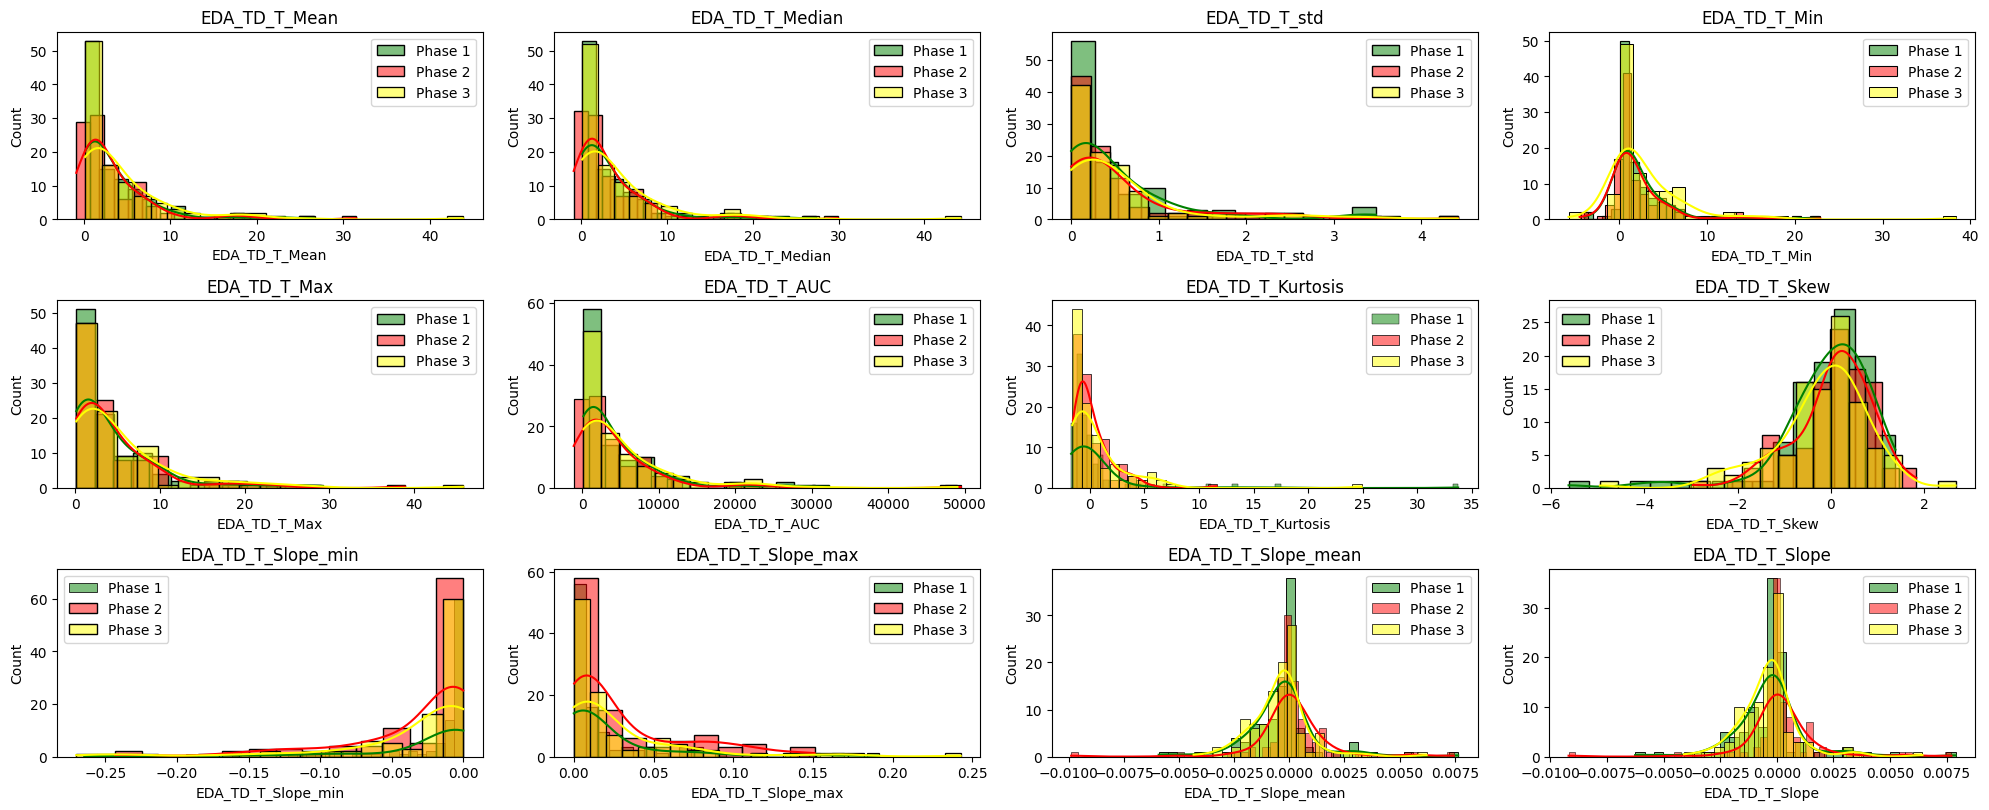

In [21]:
hist_subplots(eda_tonic, id_columns)

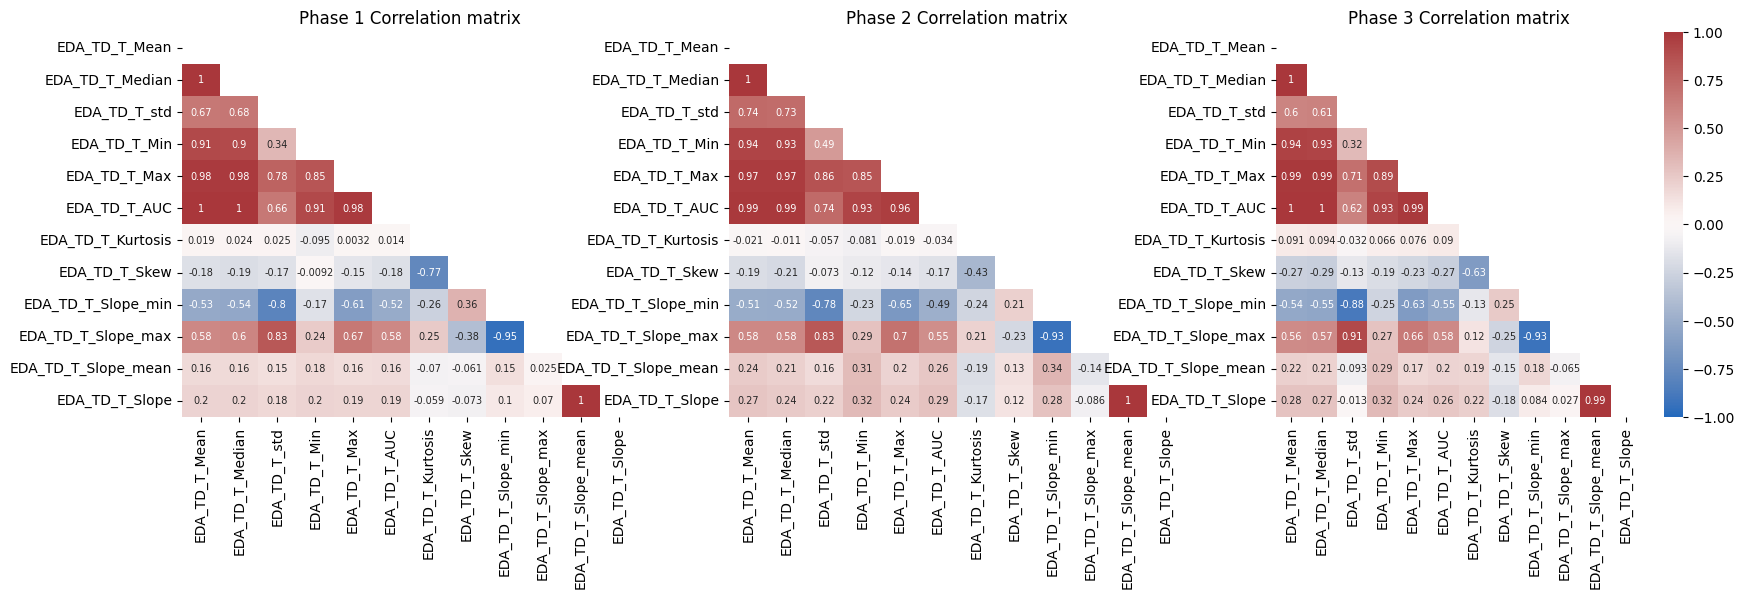

In [22]:
corr_heatmap(eda_tonic, id_columns)

## Questionnaire data

In [23]:
questionnaire_features = [col for col in questionnaire.columns if col not in id_columns]

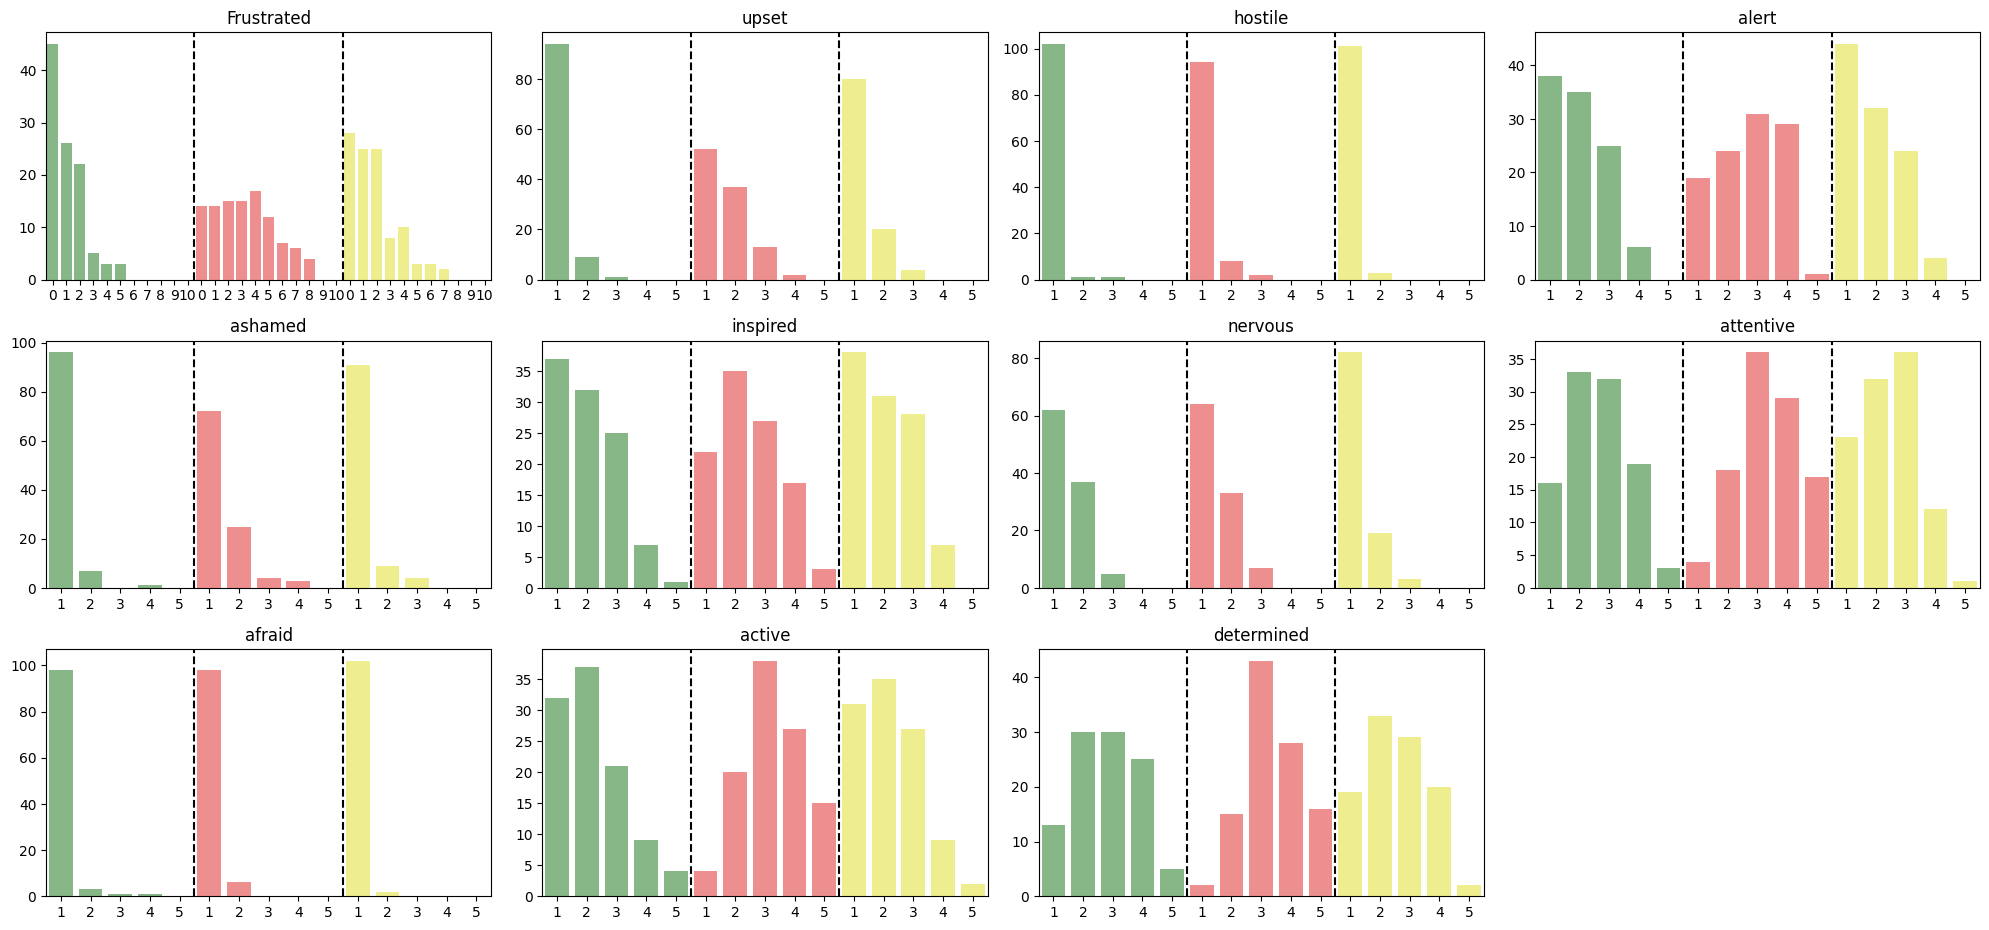

In [24]:
plt.figure(figsize=(20, 40))
# _, ax = plt.subplots(6, 3, figsize=(20,10))
for i, col in enumerate(questionnaire_features):
    if col.lower() == 'frustrated':
        full_range = list(range(0, 11))  # 0 to 10
    else:
        full_range = list(range(1, 6))   # 1 to 5

    value_counts_ph1 = questionnaire[questionnaire['Phase']=='phase1'][col].value_counts().reindex(full_range, fill_value=0)
    value_counts_ph2 = questionnaire[questionnaire['Phase']=='phase2'][col].value_counts().reindex(full_range, fill_value=0)
    value_counts_ph3 = questionnaire[questionnaire['Phase']=='phase3'][col].value_counts().reindex(full_range, fill_value=0)

    # Convert x to string to treat them as categorical labels
    plt.subplot(13, 4, i + 1)
    sns.barplot(x=[str(x) for x in value_counts_ph1.index], y=value_counts_ph1.values, color='green', alpha=0.5)
    sns.barplot(x=[str(x+0.01) for x in value_counts_ph2.index], y=value_counts_ph2.values, color='red', alpha=0.5)
    sns.barplot(x=[str(x+0.02) for x in value_counts_ph3.index], y=value_counts_ph3.values, color='yellow', alpha=0.5)
    # plt.legend()

    plt.xticks([i for i, val in enumerate([str(x) for x in full_range]*3)], [str(x) for x in full_range]*3)

    if i==0:
        plt.axvline(x=10.5, color='black', linestyle='--')
        plt.axvline(x=21.5, color='black', linestyle='--')
    else:
        plt.axvline(x=4.5, color='black', linestyle='--')
        plt.axvline(x=9.5, color='black', linestyle='--')
    
    # sns.catplot(data=questionnaire, x=col, hue='Phase', kind='count', palette=['green', 'red', 'yellow'], alpha=0.5, dodge=True, height=4, aspect=2)
                # , ax=ax[i//3][i%3])
    
    plt.title(col)
    plt.xlabel("")  
    plt.ylabel("")



plt.tight_layout()
plt.show()

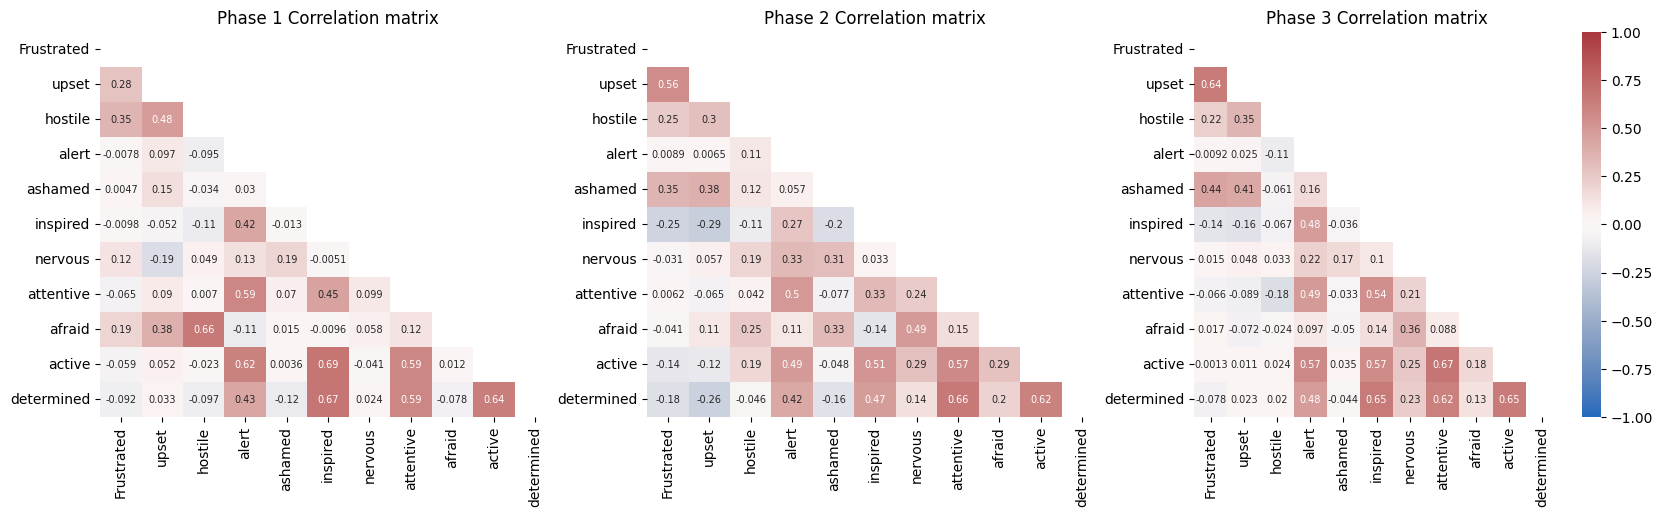

In [25]:
# Subset with only relevant features
questionnaire_subset_ph1 = questionnaire[questionnaire['Phase']=='phase1'][questionnaire_features]
questionnaire_subset_ph2 = questionnaire[questionnaire['Phase']=='phase2'][questionnaire_features]
questionnaire_subset_ph3 = questionnaire[questionnaire['Phase']=='phase3'][questionnaire_features]

# Triangular correlation matrix
mask_ph1 = np.triu(np.ones_like(questionnaire_subset_ph1.corr(), dtype=bool))
mask_ph2 = np.triu(np.ones_like(questionnaire_subset_ph2.corr(), dtype=bool))
mask_ph3 = np.triu(np.ones_like(questionnaire_subset_ph3.corr(), dtype=bool))

# Correlation heatmap
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.title('Phase 1 Correlation matrix')
sns.heatmap(questionnaire_subset_ph1.corr(), mask=mask_ph1, annot=True, annot_kws={"size": 7}, cmap='vlag', center=0, vmin=-1, vmax=1, cbar=False)
plt.subplot(1, 3, 2)
plt.title('Phase 2 Correlation matrix')
sns.heatmap(questionnaire_subset_ph2.corr(), mask=mask_ph2, annot=True, annot_kws={"size": 7}, cmap='vlag', center=0, vmin=-1, vmax=1, cbar=False)
plt.subplot(1, 3, 3)
plt.title('Phase 3 Correlation matrix')
sns.heatmap(questionnaire_subset_ph3.corr(), mask=mask_ph3, annot=True, annot_kws={"size": 7}, cmap='vlag', center=0, vmin=-1, vmax=1)

plt.show()

__________

## Preprocess data

In [26]:
# Features to compare
features = [eda_p for eda_p in eda_phasic.columns.tolist() if eda_p not in id_columns]
# features = ['EDA_TD_P_Peaks', 'EDA_TD_P_Skew', 'EDA_TD_P_ReT', 'EDA_TD_P_Slope', 'EDA_TD_P_Slope_mean', 'EDA_TD_P_RT',   
# 'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max', 'EDA_TD_T_Slope_mean', 'EDA_TD_T_Slope']

# Arrange the final DataFrame with ID columns first
relevant_data = data[id_columns + features + ['Frustrated']]
relevant_data.head()

,Round,Phase,Individual,Puzzler,original_ID,raw_data_path,Team_ID,Cohort,EDA_TD_P_Mean,EDA_TD_P_Median,...,EDA_TD_P_Kurtosis,EDA_TD_P_Skew,EDA_TD_P_Slope_min,EDA_TD_P_Slope_max,EDA_TD_P_Slope_mean,EDA_TD_P_Slope,EDA_TD_P_Peaks,EDA_TD_P_RT,EDA_TD_P_ReT,Frustrated
0,round_3,phase3,1,1,19.0,dataset/D1_4/ID_1/round_3/phase3,D1_4_Team10,D1_4,0.000172,0.000006,...,28.467716,1.091696,-0.000200,0.000198,-0.000004,4.360220e-06,11,2.522727,2.075000,2.0
1,round_3,phase2,1,1,19.0,dataset/D1_4/ID_1/round_3/phase2,D1_4_Team10,D1_4,0.000489,0.000035,...,18.455509,3.948751,-0.000273,0.000451,0.000001,-2.617585e-06,15,2.214286,2.192308,3.0
2,round_3,phase1,1,1,19.0,dataset/D1_4/ID_1/round_3/phase1,D1_4_Team10,D1_4,0.000155,0.000002,...,36.768442,5.151764,-0.000045,0.000054,-0.000001,-1.084815e-06,10,1.972222,2.111111,2.0
3,round_2,phase3,1,1,19.0,dataset/D1_4/ID_1/round_2/phase3,D1_4_Team10,D1_4,0.000673,0.000018,...,19.045235,4.165664,-0.000271,0.000309,0.000002,-5.062888e-08,12,1.886364,1.805556,2.0
4,round_2,phase2,1,1,19.0,dataset/D1_4/ID_1/round_2/phase2,D1_4_Team10,D1_4,0.001164,0.000074,...,20.998111,4.209074,-0.000646,0.000639,0.000005,1.344367e-05,20,1.812500,1.926471,2.0


_________

# Analyse physiological measures

***The features were chosen manually based on the distribution differences between phase 1, 2, and 3 for the individual features!***

EDA is said to be a good measure of stress responses: https://www.ncbi.nlm.nih.gov/books/NBK589926/#ch5

In [27]:
# Compute task mean (phase2) per individual
phase_two_data = relevant_data[relevant_data['Phase'] == 'phase2'].groupby("Individual")[features+ ['Frustrated']].mean()

# Get only physiological data
task_data = phase_two_data[[col for col in phase_two_data.columns if 'EDA_' in col]].copy()
task_data.columns = [f"{col}_Task" for col in task_data.columns]

task_data.head()

,EDA_TD_P_Mean_Task,EDA_TD_P_Median_Task,EDA_TD_P_std_Task,EDA_TD_P_Min_Task,EDA_TD_P_Max_Task,EDA_TD_P_AUC_Task,EDA_TD_P_Kurtosis_Task,EDA_TD_P_Skew_Task,EDA_TD_P_Slope_min_Task,EDA_TD_P_Slope_max_Task,EDA_TD_P_Slope_mean_Task,EDA_TD_P_Slope_Task,EDA_TD_P_Peaks_Task,EDA_TD_P_RT_Task,EDA_TD_P_ReT_Task
Individual,,,,,,,,,,,,,,,
1,0.001100,0.000076,0.002832,-0.000863,0.022650,1.394200,26.167020,4.574814,-0.000503,0.000566,0.000004,0.000003,16.75,1.937369,2.052016
2,0.229599,0.121726,0.274403,0.000000,1.351653,290.182450,4.154340,1.987789,-0.030472,0.035991,0.000457,0.000320,32.50,1.935707,1.656207
3,0.090439,0.055678,0.097794,-0.001681,0.519752,114.234736,4.268931,2.000525,-0.017785,0.021405,0.000182,0.000029,38.25,1.903048,1.814105
4,0.697018,0.465595,0.645937,-0.013727,3.384588,877.188407,3.018744,1.574065,-0.060457,0.087578,0.001536,0.001240,41.00,1.568600,1.554798
5,0.546609,0.393956,0.537014,0.000000,3.769016,687.195224,8.418619,2.348305,-0.110531,0.143738,0.000921,0.000981,31.50,2.121259,1.758533


In [28]:
# Check for missing values
missing_values = task_data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing values in task data:\n", missing_values)

Missing values in task data:
 Series([], dtype: int64)


In [29]:
# Apply standardization to the features - Clustering and PCA are sensitive to scale
scaler = StandardScaler()
task_data_scaled = scaler.fit_transform(task_data)
task_data_scaled = pd.DataFrame(task_data_scaled, columns=task_data.columns)

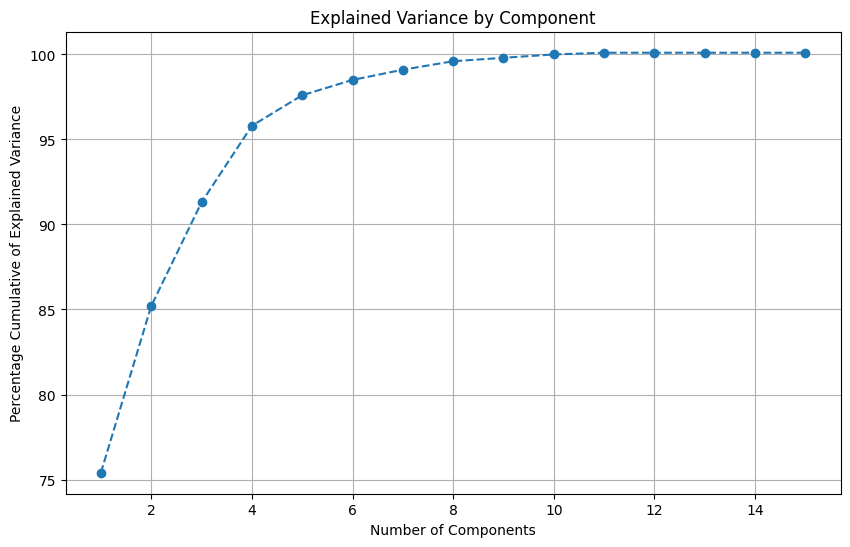

In [30]:
# PCA to reduce dimensionality
# Perform PCA analysis to find the number of components to keep
pca = PCA(random_state=42)
pca.fit(task_data_scaled)
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)

plt.figure(figsize = (10,6))
plt.plot(range(1, len(per_var)+1), per_var.cumsum(), marker = "o", linestyle = "--")
plt.grid()
plt.ylabel("Percentage Cumulative of Explained Variance")
plt.xlabel("Number of Components")
plt.title("Explained Variance by Component")
plt.show()

In [31]:
pca = PCA(n_components = 3, random_state=42)
task_data_scaled_reduced = pca.fit_transform(task_data_scaled)

----------------

# Clustering Methods

## K-means Clustering

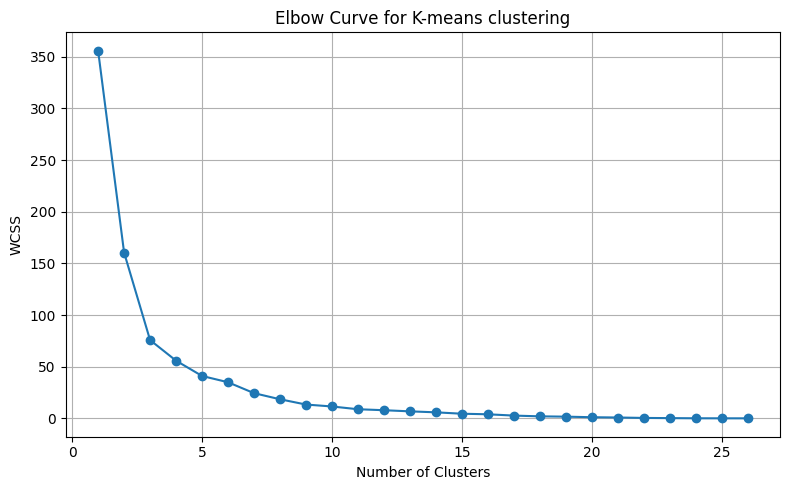

In [59]:
# Elbow method: Calculate inertia for k from 1 to 10
WCSS = []
for i in range(1,27):
  kmeans_pca = KMeans(n_clusters = i, init = "k-means++", random_state = 42, n_init='auto')
  kmeans_pca.fit(task_data_scaled_reduced)
  WCSS.append(kmeans_pca.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1,27), WCSS, marker='o')
plt.title("Elbow Curve for K-means clustering")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.tight_layout()
plt.show()

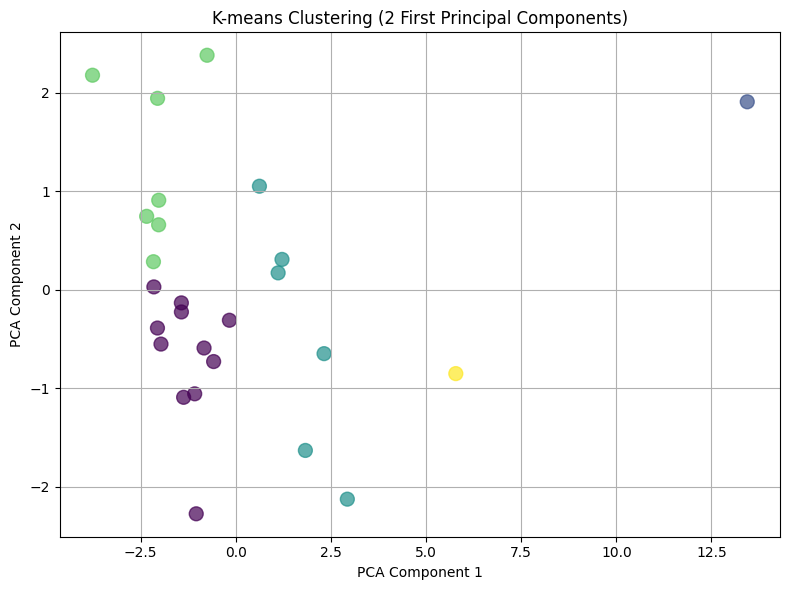

In [56]:
# KMeans clustering on PCA result
kmeans = KMeans(n_clusters=5, random_state=42, init = "k-means++", n_init='auto')
labels_kmeans = kmeans.fit_predict(task_data_scaled_reduced)

# Plot PCA with clusters
plt.figure(figsize=(8, 6))
plt.scatter(task_data_scaled_reduced[:, 0], task_data_scaled_reduced[:, 1], c=labels_kmeans, cmap="viridis", s=100, alpha=0.7)
plt.title("K-means Clustering (2 First Principal Components)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

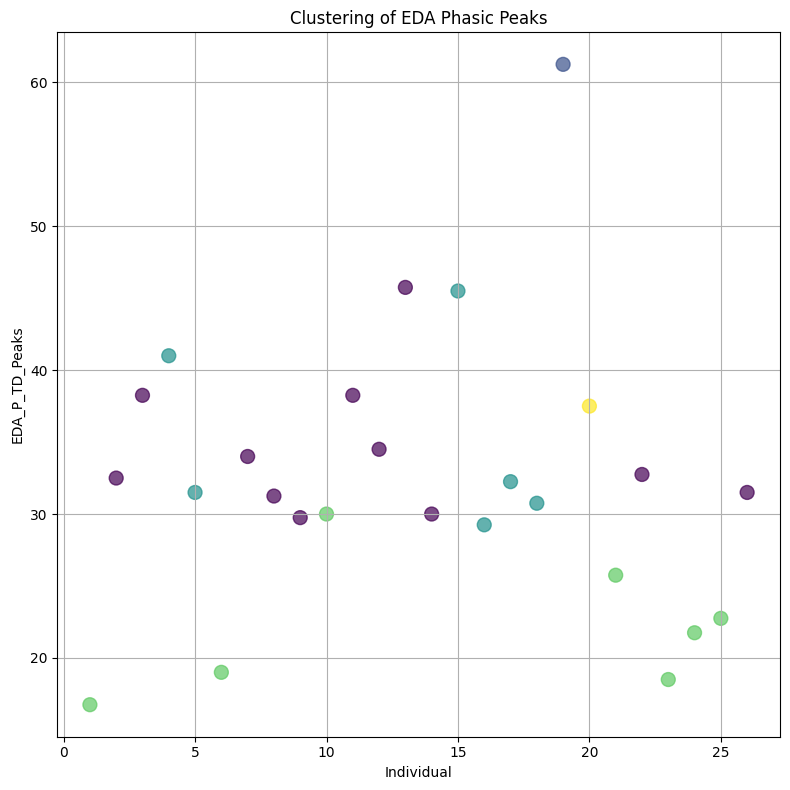

In [34]:
# Plot the results
plt.figure(figsize=(8, 8))
plt.scatter(task_data.index, task_data["EDA_TD_P_Peaks_Task"], 
            c=labels_kmeans, cmap="viridis", s=100, alpha=0.7)
plt.title("Clustering of EDA Phasic Peaks")
plt.xlabel("Individual")
plt.ylabel("EDA_P_TD_Peaks")
plt.grid(True)
plt.tight_layout()
plt.show()

## Hierarchical Clustering

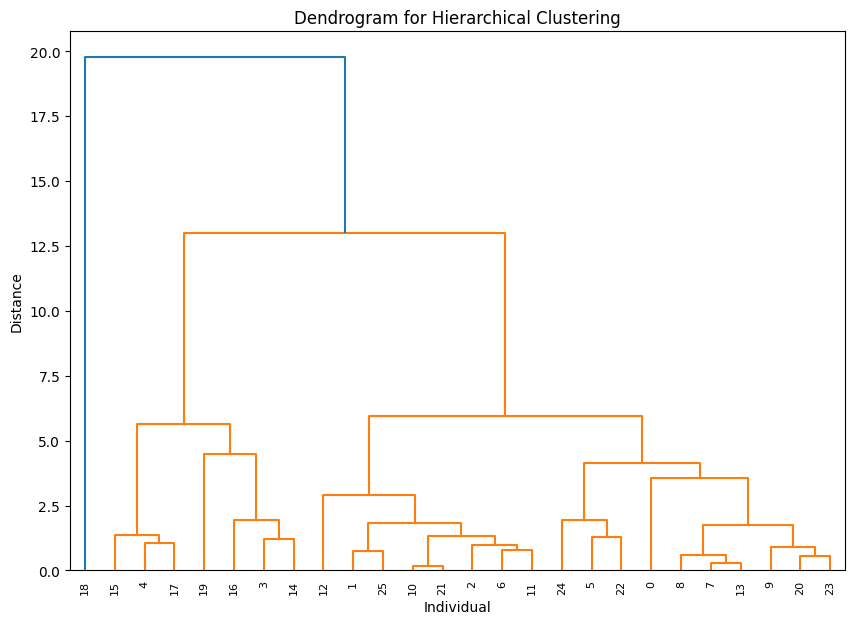

In [35]:
# Create a dendrogram to visualize how clusters are formed
plt.figure(figsize=(10, 7))
Z = linkage(task_data_scaled_reduced, method='ward', metric='euclidean')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8., truncate_mode='lastp')
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Individual')
plt.ylabel('Distance')
plt.show()

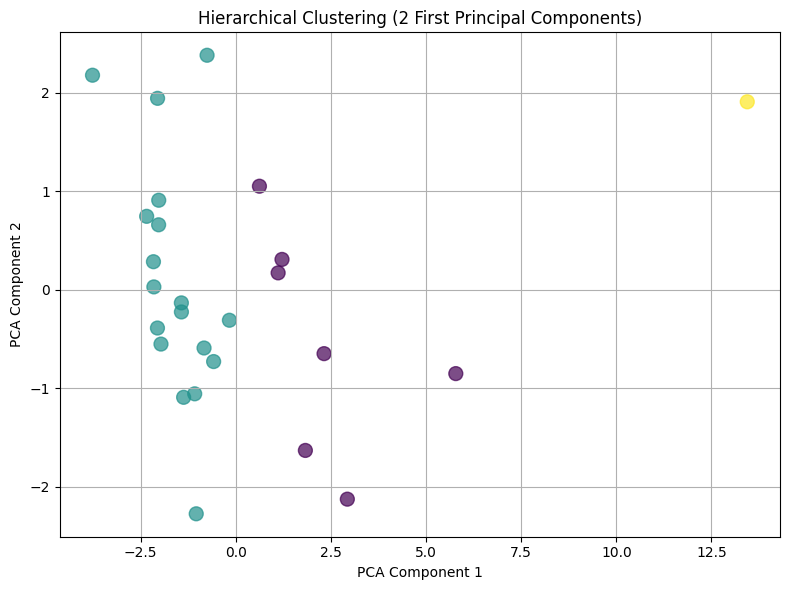

In [58]:
# Fit Hierarchical Clustering
k_hierarchical = 3  # Number of clusters
labels_hierarchical = fcluster(Z, k_hierarchical, criterion='maxclust')

# Plot PCA with clusters
plt.figure(figsize=(8, 6))
plt.scatter(task_data_scaled_reduced[:, 0], task_data_scaled_reduced[:, 1], c=labels_hierarchical, cmap="viridis", s=100, alpha=0.7)
plt.title(f"Hierarchical Clustering (2 First Principal Components)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

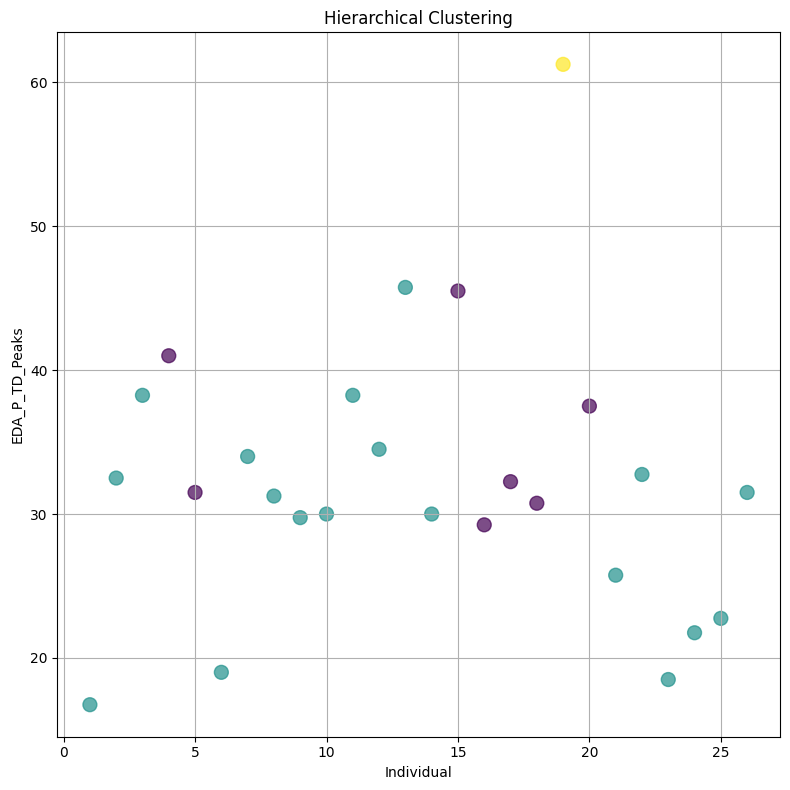

In [37]:
# Visualize clusters
plt.figure(figsize=(8, 8))
plt.scatter(task_data.index, task_data["EDA_TD_P_Peaks_Task"], 
            c=labels_hierarchical, cmap="viridis", s=100, alpha=0.7)
plt.title("Hierarchical Clustering")
plt.xlabel("Individual")
plt.ylabel("EDA_P_TD_Peaks")
plt.grid(True)
plt.tight_layout()
plt.show()

## GMM Clustering

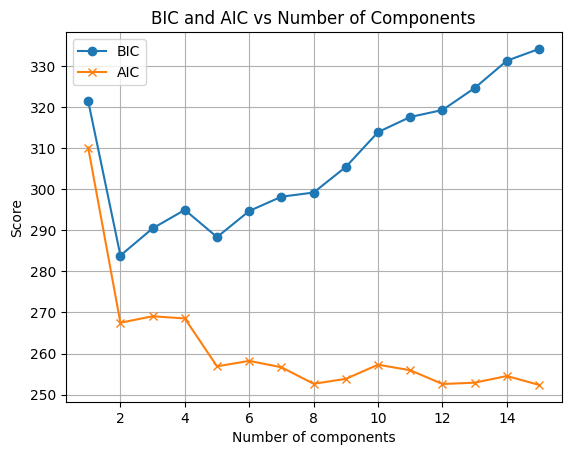

In [38]:
bic_scores = []
aic_scores = []

for k in range(1,16):
    gmm = GaussianMixture(n_components=k, random_state=42, covariance_type  = "tied", max_iter = 1000, reg_covar=1e-3)
    gmm.fit(task_data_scaled_reduced)
    bic_scores.append(gmm.bic(task_data_scaled_reduced))
    aic_scores.append(gmm.aic(task_data_scaled_reduced))

plt.plot(range(1, 16), bic_scores, label='BIC', marker='o')
plt.plot(range(1, 16), aic_scores, label='AIC', marker='x')
plt.xlabel('Number of components')
plt.ylabel('Score')
plt.title('BIC and AIC vs Number of Components')
plt.legend()
plt.grid(True)
plt.show()

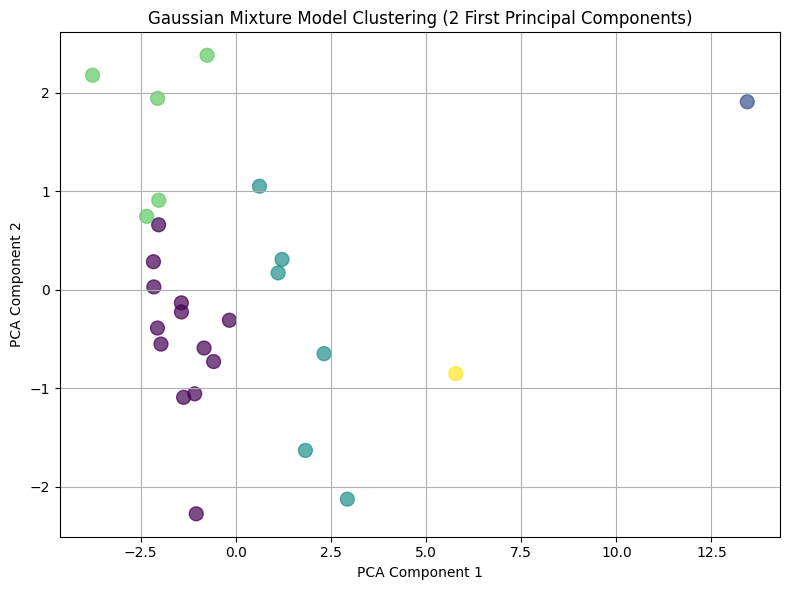

In [57]:
# Fit GMM
gmm = GaussianMixture(n_components=5, covariance_type='tied', random_state=42, max_iter = 1000, reg_covar=1e-3) 
gmm_labels = gmm.fit_predict(task_data_scaled_reduced)

# Plot PCA with clusters
plt.figure(figsize=(8, 6))
plt.scatter(task_data_scaled_reduced[:, 0], task_data_scaled_reduced[:, 1], c=gmm_labels, cmap="viridis", s=100, alpha=0.7)
plt.title("Gaussian Mixture Model Clustering (2 First Principal Components)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

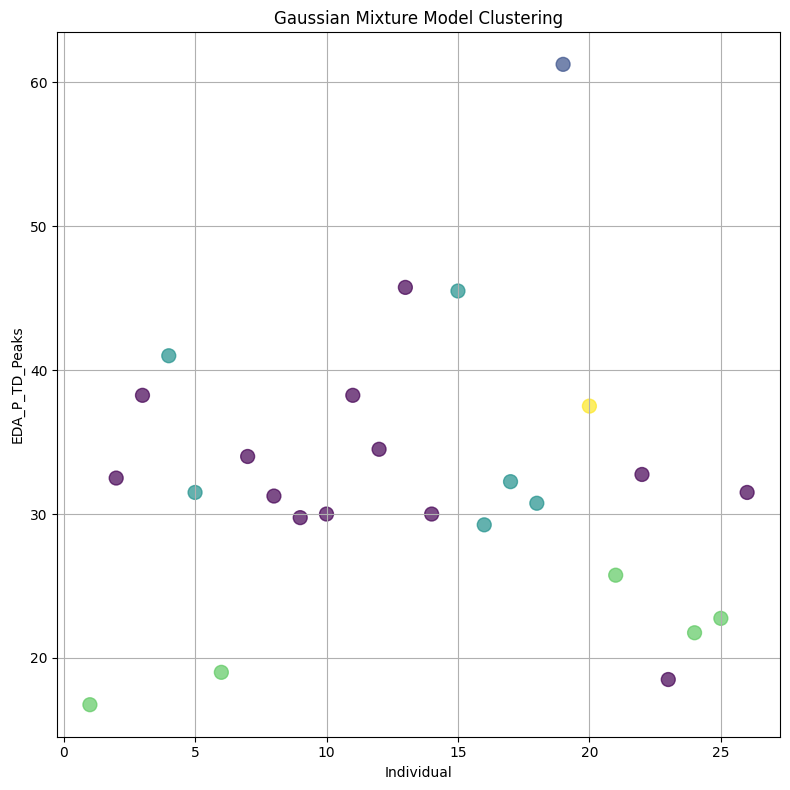

In [40]:
# Visualize clusters (optional, based on PCA if necessary)
plt.figure(figsize=(8, 8))
plt.scatter(task_data.index, task_data["EDA_TD_P_Peaks_Task"], 
            c=gmm_labels, cmap="viridis", s=100, alpha=0.7)
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Individual")
plt.ylabel("EDA_P_TD_Peaks")
plt.grid(True)
plt.tight_layout()
plt.show()

# Model Validation Metrics: KMeans vs Hierarchical vs GMM

In [41]:
# Lower is better!
# Davies-Bouldin Score for K-means
davies_bouldin_kmeans = davies_bouldin_score(task_data_scaled, labels_kmeans)
print(f"Davies-Bouldin Score for K-means: {davies_bouldin_kmeans}")

# Davies-Bouldin Score for Hierarchical Clustering
davies_bouldin_hierarchical = davies_bouldin_score(task_data_scaled, labels_hierarchical)
print(f"Davies-Bouldin Score for Hierarchical Clustering: {davies_bouldin_hierarchical}")

# Davies-Bouldin Score for GMM
davies_bouldin_gmm = davies_bouldin_score(task_data_scaled, gmm_labels)
print(f"Davies-Bouldin Score for GMM: {davies_bouldin_gmm}")

# Add scores to a dictionary for easy access
scores = {'KMeans': [davies_bouldin_kmeans, kmeans.n_clusters],
            'Hierarchical': [davies_bouldin_hierarchical, k_hierarchical], 
            'GMM': [davies_bouldin_gmm, gmm.n_components]}

Davies-Bouldin Score for K-means: 0.8380289135816247
Davies-Bouldin Score for Hierarchical Clustering: 0.6899946885447535
Davies-Bouldin Score for GMM: 0.8323767888456732


In [42]:
best_model = min(scores, key=lambda x: scores[x][0])
print(f'Best model is {best_model} clustering model with {scores[best_model][1]} clusters.')

Best model is Hierarchical clustering model with 3 clusters.


# Physiological (Felt) vs. Reported (Perceived) Stress Level

## Assign each cluster a  felt stress level

In [43]:
# Compute cluster summary 
task_data["Cluster"] = labels_hierarchical
cluster_summary = task_data.groupby("Cluster").mean().reset_index().copy()
cluster_summary

,Cluster,EDA_TD_P_Mean_Task,EDA_TD_P_Median_Task,EDA_TD_P_std_Task,EDA_TD_P_Min_Task,EDA_TD_P_Max_Task,EDA_TD_P_AUC_Task,EDA_TD_P_Kurtosis_Task,EDA_TD_P_Skew_Task,EDA_TD_P_Slope_min_Task,EDA_TD_P_Slope_max_Task,EDA_TD_P_Slope_mean_Task,EDA_TD_P_Slope_Task,EDA_TD_P_Peaks_Task,EDA_TD_P_RT_Task,EDA_TD_P_ReT_Task
0,1,1.102107,0.841187,0.960755,-0.008753,4.915262,1408.763805,4.130042,1.778956,-0.095159,0.127243,0.001402,0.000941,35.392857,1.763615,1.524331
1,2,0.102500,0.054367,0.133201,-0.013569,0.781678,131.291000,10.460396,2.777227,-0.018981,0.024377,0.000206,0.000134,29.611111,1.873482,1.901947
2,3,5.954087,6.058037,1.900761,-0.177549,11.213317,7328.020991,0.362980,-0.110650,-0.217105,0.339374,0.008355,0.004020,61.250000,1.508592,0.999665


In [44]:
# Find which variable to use to assign each cluster a stress level
# Number of principal components
n_pcs = pca.components_.shape[0]

# Get the most important feature of each component
most_important = [features[np.abs(pca.components_[i]).argmax()] for i in range(n_pcs)]
most_important

['EDA_TD_P_AUC', 'EDA_TD_P_RT', 'EDA_TD_P_RT']

In [45]:
# Variable that is to be used to assign each cluster a stress level
cluster_summary[['Cluster', most_important[0]+'_Task']]

,Cluster,EDA_TD_P_AUC_Task
0,1,1408.763805
1,2,131.291000
2,3,7328.020991


In [46]:
# Assign stress levels based on the most important feature of the first PC
phase_two_data['FeltStress'] = task_data['Cluster'].map({1: 'Medium', 2: 'Low', 3: 'High'})

## Assign perceived stress level from "Frustrated" questionnaire variable

In [47]:
phase_two_data['Frustrated'].describe()

count    26.000000
mean      3.201923
std       1.501698
min       0.250000
25%       2.000000
50%       3.625000
75%       4.500000
max       5.500000
Name: Frustrated, dtype: float64

In [48]:
phase_two_data['Frustrated'].unique()
# As all the values are between 1 and 5, and are incremented by 0.25, we can use the same scale for the stress levels

array([2.  , 0.5 , 0.25, 3.  , 1.  , 3.75, 4.5 , 4.  , 3.5 , 4.75, 5.25,
       2.25, 1.25, 5.5 , 2.5 , 4.25])

In [49]:
# Assign perceived stress level
for row in phase_two_data.iterrows():

    # If the value is in [0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2], assign 'Low'
    if row[1]['Frustrated'] in np.arange(0, 2 + 0.25, 0.25):
        phase_two_data.loc[row[0],'PerceivedStress'] = 'Low'

    # If the value is in [2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25], assign 'Medium'
    elif row[1]['Frustrated'] in np.arange(2.25, 4.25 + 0.25, 0.25):
        phase_two_data.loc[row[0],'PerceivedStress'] = 'Medium'

    # If the value is in [4.5, 4.75, 5, 5.25, 5.5, 5.75, 6], assign 'High'
    elif row[1]['Frustrated'] in np.arange(4.5, 6 + 0.25, 0.25):
        phase_two_data.loc[row[0],'PerceivedStress'] = 'High'

    # Else, assign Unknonwn
    else:
        print(row[1]['Frustrated'] )
        phase_two_data.loc[row[0],'PerceivedStress'] = 'Unknown'

In [50]:
phase_two_data[['Frustrated', 'PerceivedStress', 'FeltStress']]

,Frustrated,PerceivedStress,FeltStress
Individual,,,
1,2.00,Low,Low
2,2.00,Low,Low
3,0.50,Low,Low
4,0.25,Low,Medium
5,3.00,Medium,Medium
6,1.00,Low,Low
7,3.75,Medium,Low
8,4.50,High,Low
9,2.00,Low,Low


## Analyze felt vs. perceived stress levels per individual

In [51]:
# Participant's who correctly and wrongly identified their stimulation level
correctly_identified = phase_two_data[phase_two_data['FeltStress'] == phase_two_data['PerceivedStress']]
wrongly_identified = phase_two_data[phase_two_data['FeltStress'] != phase_two_data['PerceivedStress']]

In [52]:
print(f"Correctly identified: {len(correctly_identified)}")
print(f"Wrongly identified: {len(wrongly_identified)}")

Correctly identified: 9
Wrongly identified: 17


In [53]:
# Remapping categorical values to numeric values for easier numeric comparison
phase_two_data['FeltStressNumeric'] = phase_two_data['FeltStress'].map({'Low': 1, 'Medium': 2, 'High': 3})
phase_two_data['PerceivedStressNumeric'] = phase_two_data['PerceivedStress'].map({'Low': 1, 'Medium': 2, 'High': 3})

In [54]:
# Participant's who felt more and less stressed than they perceived
felt_more_stressed = phase_two_data[phase_two_data['FeltStressNumeric'] < phase_two_data['PerceivedStressNumeric']]
felt_less_stressed = phase_two_data[phase_two_data['FeltStressNumeric'] > phase_two_data['PerceivedStressNumeric']]

In [55]:
print(f"Reported MORE stress than they actually felt: {len(felt_more_stressed)}")
print(f"Reported LESS stress than they actually felt: {len(felt_less_stressed)}")

Reported MORE stress than they actually felt: 15
Reported LESS stress than they actually felt: 2
